<a href="https://colab.research.google.com/github/sathana-15/DevOps/blob/main/Petrol_Price_Analyzer_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
import pandas as pd
import numpy as np


np.random.seed(42)

dates = pd.date_range(start="2024-01-01", end="2024-12-31")
cities = ["Delhi", "Mumbai", "Chennai", "Kolkata"]

data = {
    "Date": np.repeat(dates, len(cities)),
    "City": cities * len(dates),
    "Petrol_Price": np.random.normal(105, 3, len(dates) * len(cities)).round(2)
}

df = pd.DataFrame(data)

df.to_csv("petrol_prices.csv", index=False)


df.head(10)


,Date,City,Petrol_Price
0,2024-01-01,Delhi,106.49
1,2024-01-01,Mumbai,104.59
2,2024-01-01,Chennai,106.94
3,2024-01-01,Kolkata,109.57
4,2024-01-02,Delhi,104.30
5,2024-01-02,Mumbai,104.30
6,2024-01-02,Chennai,109.74
7,2024-01-02,Kolkata,107.30
8,2024-01-03,Delhi,103.59
9,2024-01-03,Mumbai,106.63


In [ ]:
print("Dataset Info:\n")
print(df.info())

print("\nMissing values:\n")
print(df.isnull().sum())

print("\nDescriptive Statistics:\n")
print(df.describe())

print("\nUnique Cities:", df['City'].unique())

df.sample(5)


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1464 non-null   datetime64[ns]
 1   City          1464 non-null   object        
 2   Petrol_Price  1464 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 34.4+ KB
None

Missing values:

Date            0
City            0
Petrol_Price    0
dtype: int64

Descriptive Statistics:

                                Date  Petrol_Price
count                           1464   1464.000000
mean   2024-07-01 12:00:00.000000256    105.130157
min              2024-01-01 00:00:00     95.280000
25%              2024-04-01 00:00:00    103.112500
50%              2024-07-01 12:00:00    105.145000
75%              2024-10-01 00:00:00    107.020000
max              2024-12-31 00:00:00    116.560000
std                              

,Date,City,Petrol_Price
316,2024-03-20,Delhi,107.05
188,2024-02-17,Delhi,102.46
735,2024-07-02,Kolkata,106.42
248,2024-03-03,Delhi,110.30
341,2024-03-26,Mumbai,105.73


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


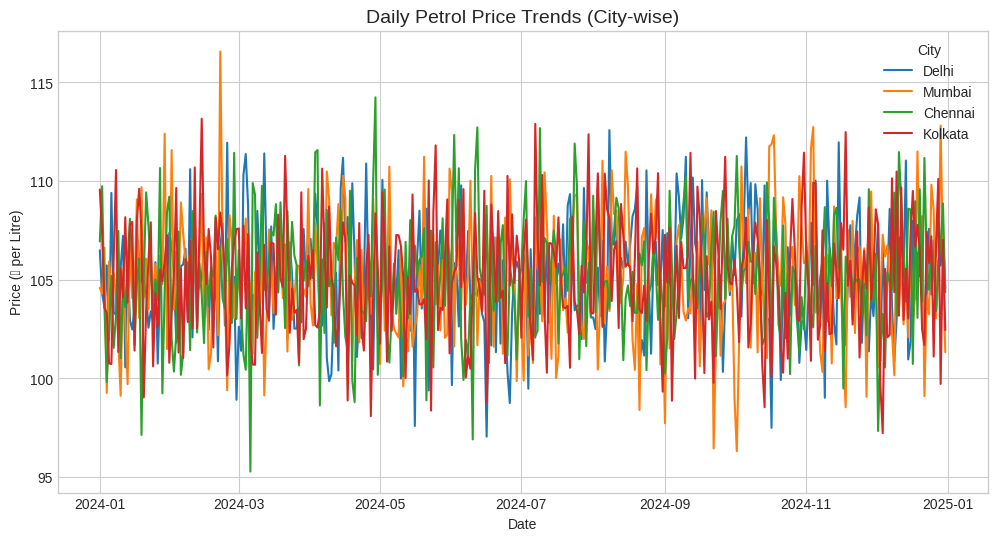

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


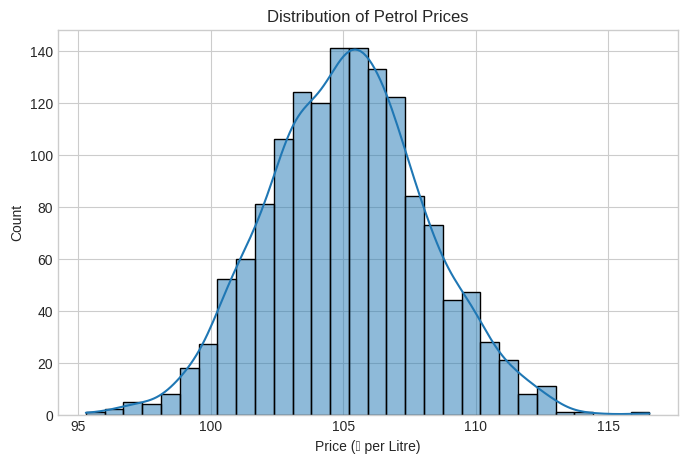

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="Petrol_Price", hue="City")
plt.title("Daily Petrol Price Trends (City-wise)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price (₹ per Litre)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['Petrol_Price'], bins=30, kde=True)
plt.title("Distribution of Petrol Prices")
plt.xlabel("Price (₹ per Litre)")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

le = LabelEncoder()
df['City_Code'] = le.fit_transform(df['City'])

df_processed = df[['Day', 'Month', 'Year', 'City_Code', 'Petrol_Price']]
df_processed.head()


,Day,Month,Year,City_Code,Petrol_Price
0,1,1,2024,1,106.49
1,1,1,2024,3,104.59
2,1,1,2024,0,106.94
3,1,1,2024,2,109.57
4,2,1,2024,1,104.30


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df_processed[['Day', 'Month', 'Year', 'City_Code']]
y = df_processed['Petrol_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Model Performance:
MAE: 2.4236844471449124
MSE: 9.279426282049775
R² Score: -0.007583572197515709


In [ ]:

sample = pd.DataFrame({
    'Day': [10],
    'Month': [2],
    'Year': [2025],
    'City_Code': [le.transform(['Mumbai'])[0]]
})

predicted_price = model.predict(sample)[0]
print(f"Predicted Petrol Price in Mumbai on 2025-02-10: ₹{predicted_price:.2f}")


Predicted Petrol Price in Mumbai on 2025-02-10: ₹104.88


In [ ]:
import joblib

joblib.dump(model, "petrol_price_model.pkl")
print("Model saved successfully!")


Model saved successfully!
